<a href="https://colab.research.google.com/github/lucasestrela/dec_consumo_poupanca/blob/main/Lista_1_Vari%C3%A1veis_instrumentais_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problema 1)** 

Considere o modelo:

$$y_t = \mu + \phi_1 y_{t-1} + \varepsilon_t$$

em que $|\phi_1| < 1$ e $\varepsilon_t \sim iidN(0, \sigma^2_{\varepsilon})$. Suponha que tenhamos uma amostra $y_t$, $t = 0, ..., T$, com $y_0 = 0$

## Item a)
Calcule $E[\varepsilon_t]$, $E[\varepsilon_t y_{t-1}]$, $E[\varepsilon_t y_{t-2}]$ e $E[\varepsilon_t^2]$

---
**Resposta**

* $E[\varepsilon_t] = 0$

Podemos escrever o processo de $y_t$ recursivamente como $y_t = \mu \sum_{i=0}^{t-1} \phi_1^i + \phi_1^t y_0 + \sum_{i=0}^{t-1} \phi_1^i \varepsilon_{t-i}$ e como sabemos que $|\phi_1| < 1$, então $y_t = \frac{\mu}{1-\phi_1} + \sum_{i=0}^{\infty} \phi_1^i \varepsilon_{t-i}$. Substituindo a expressão no valor esperado, temos:

* 
$$  E[\varepsilon_t y_{t-1}] = E \bigg[\varepsilon_t \Big(\frac{\mu}{1-\phi_1} + \sum_{i=0}^{\infty} \phi_1^i \varepsilon_{t-i} \Big ) \bigg] = \sum_{i=0}^{\infty} \phi_1^i E[\varepsilon_t \varepsilon_{t-i}] = 0 $$

De modo semelhante,
* $E[\varepsilon_t y_{t-2}] = 0 $

* $E[\varepsilon_t^2] = Var(\varepsilon_t) + E^2[\varepsilon_t] = \sigma^2_{\varepsilon}$


## Item b)

Usando os resultados de (a) construa condições de momento para estimar $\mu$, $\sigma^2_\varepsilon$ e $\phi_1$

---
**Resposta**

Uma vez que queremos estimar 3 parâmetros, precisamos de pelo menos 3 condições de momentos populacionais. Do item anterior já possuímos:


1.  $E[\varepsilon_t] = E[y_t - \phi_1 y_{t-1} - \mu] = 0$.

2.  $E[\varepsilon_t y_{t-1}] = E[(y_t - \phi_1 y_{t-1} - \mu) y_{t-1}] = 0 $

3.  $E[\varepsilon_t y_{t-1}] = E[(y_t - \phi_1 y_{t-1} - \mu) y_{t-2}] = 0 $

4.  $E[\varepsilon_t^2] = \sigma^2_{\varepsilon}$.

Igualando os momentos populacionais aos momentos amostrais, escrevemos:

\begin{align}
    \sum_{j=1}^{T} y_j - \hat{\phi_1} y_{j-1} - \hat{\mu} = 0 \tag{1} \\
    \sum_{j=1}^{T} (y_j - \hat{\phi_1} y_{j-1} - \hat{\mu}) y_{j-1} = 0  \tag{2}\\
    \sum_{j=1}^{T} (y_j - \hat{\phi_1} y_{j-1} - \hat{\mu}) y_{j-2} = 0  \tag{3}\\
    \sum_{j=1}^{T} \hat{\varepsilon}_j^2 - T \hat{\sigma}^2_{\varepsilon} = 0  \tag{4}
\end{align}

rearrajando os termos de (1), obtemos

$$\sum_{j=1}^{T} y_j - \hat{\phi_1} \sum_{j=1}^{T} y_{j-1} = \hat{\mu}.$$

Rearranjando (2) e substituindo a equação acima,

\begin{align*}
    \sum_{j=1}^{T} \Bigg[ \Big(y_j - \hat{\phi_1} y_{j-1} - \sum_{j=1}^{T} y_j + \hat{\phi_1} \sum_{j=1}^{T} y_{j-1} \Big) y_{j-1}\bigg] = 0\\
   \sum_{j=1}^{T} \Bigg[ \Big(y_j - \Big( \sum_{j=1}^{T} y_j \Big) + \hat{\phi_1} \Big(\sum_{j=1}^{T} y_{j-1} \Big)- \hat{\phi_1} y_{j-1}  \Big) y_{j-1}\Bigg] = 0\\
   \sum_{j=1}^{T} \Bigg[ \Big(y_j - \Big( \sum_{j=1}^{T} y_j \Big)- \hat{\phi_1} \bigg[ y_{j-1} - \Big(\sum_{j=1}^{T} y_{j-1} \Big)  \bigg ] \Big)  y_{j-1}\Bigg] = 0\\
   \sum_{j=1}^{T} \bigg [ y_j - \Big( \sum_{j=1}^{T} y_j \Big) \bigg ] y_{j-1} = \hat{\phi_1} \sum_{j=1}^{T}  \bigg[ y_{j-1} - \Big(\sum_{j=1}^{T} y_{j-1} \Big)  \bigg ] y_{j-1}\\
   \frac{\sum_{j=1}^{T} \bigg [ y_j - \Big( \sum_{j=1}^{T} y_j \Big) \bigg ] y_{j-1}}{\sum_{j=1}^{T}  \bigg[ y_{j-1} - \Big(\sum_{j=1}^{T} y_{j-1} \Big)  \bigg ] y_{j-1}} = \hat{\phi_1} \\
\end{align*}


por último, de (4)

\begin{align*}
\sum_{j=1}^{T} \hat{\varepsilon}_j^2 = T \hat{\sigma}^2_{\varepsilon} \\
\sum_{j=1}^{T}  (y_j - \hat{\phi_1} y_{j-1} - \hat{\mu})^2 = T \hat{\sigma}^2_{\varepsilon} \\
\frac{\sum_{j=1}^{T}  (y_j - \hat{y}_{j} )^2}{T} = \hat{\sigma}^2_{\varepsilon} \\
\end{align*}

## Item c)
Explique como seria implementado o estimador GMM para as condições de momento definidas em (b)



---
**Resposta**

Seja

\begin{align*}
    h(\boldsymbol\theta ; w) = 
    \begin{pmatrix}
    y_t - \phi_1 y_{t-1} - \mu \\
    (y_t - \phi_1 y_{t-1} - \mu) y_{t-1} \\
    (y_t - \phi_1 y_{t-1} - \mu) y_{t-2} \\
    \varepsilon_j^2 - \sigma^2_{\varepsilon}
\end{pmatrix}
\end{align*}

e $g(\boldsymbol\theta ; w) = \frac{1}{T}  \sum_{j=1}^{T} h(\boldsymbol\theta ; w)$, isto é,

\begin{align*}
    g(\boldsymbol\theta ; w) = 
    \begin{pmatrix}
    \frac{1}{T} \sum_{j=1}^{T} y_j - \phi_1 y_{j-1} - \mu \\
    \frac{1}{T} \sum_{j=1}^{T} (y_j - \phi_1 y_{j-1} - \mu) y_{j-1} \\
    \frac{1}{T} \sum_{j=1}^{T} (y_j - \phi_1 y_{j-1} - \mu) y_{j-2} \\
    \frac{1}{T} \sum_{j=1}^{T} \varepsilon_j^2 - \sigma^2_{\varepsilon}
\end{pmatrix}
\end{align*}

Para implementar o estimador GMM, deve-se encontrar o argumento que minimiza a seguinte forma quadrática:

\begin{align*}
    Q(\boldsymbol \theta; Y_t) = [g(\boldsymbol \theta; Y_t)]' W [g(\boldsymbol \theta; Y_t)],
\end{align*}
onde $W$ é uma matriz de pesos.

## Item d)  
Seria possivel realizar o teste J de sobreidentificação? Por que?

---
 **Resposta**

 Não é possível, pois as condições de momento são da mesma dimensão dos parâmetros, isto é, esta exatamente identificado. Assim, não é possível fazer o teste de sobreidentificação

## Item e)

Simule um AR(1) com $\mu = 2$, $\phi_1 = 0.5$ e $\varepsilon_t \sim iidN(0, \sigma^2_{\varepsilon})$ sendo $\sigma_\varepsilon^2 = 1$ e $t = 0, ..., T$. Assuma que $y_0 = 0$. Considere dois tamanhos de amostra, $T = 100$ e $T = 500$. Para cada tamanho de amostra:


> 1. Use as condições de momento definidas em (b) para estimar o vetor de parâmetros $\boldsymbol\theta = [\mu \quad \sigma^2_\varepsilon  \quad  \phi_1]'$ e faça o teste J de sobreidentificação, usando o nível de significância de 5%.

> 2. Repita este procedimento mil vezes, obtendo $\hat\mu^{(r)}, \hat\phi_1^{(r)}, {\hat\sigma^2_{\varepsilon}}^{(r)}$ , $r = 1, ..., 1000$.

> 3. Estude o comportamento dessas estimativas (média, desvio-padrão, máximo, mínimo, histograma) e calcule o tamanho
do teste J de sobreidentificação.





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.gmm import GMM
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Definindo condições de Momento

In [2]:
class gmm(GMM):
    
    def momcond(self, params):
        p0, p1, p2 = params
        
        endog = self.endog[:, None]
        exog  = self.exog
        inst  = self.instrument 
  
        m1 =  yt - p0 - p1*yt_1
        m2 = (yt - p0 - p1*yt_1)*yt_1
        m3 = (yt - p0 - p1*yt_1)*yt_2
        m4 = (yt - p0 - p1*yt_1)**2 - p2
        
        g = np.column_stack((m1, m2, m3, m4))
        
        
        return g

### Simulando e estimando AR(1)

In [ ]:
# Tamanhos de amostras
T1, T2 = 100, 500
repeticoes = 1000

# ''Chute'' inicial dos coeficientes
beta0 = np.array([2, 0.5, 1])

# Criando vetor de parametros/testes a ser populado
parametros = np.ones( (repeticoes, 3, 2) ) * np.inf
p_vals     = np.ones( (repeticoes, 2) ) * np.inf


for i in range(0, repeticoes):

#####################################################
###################### T = 100 ######################
#####################################################

  # Simulando T1 obs de normal(0,1)
  erro1 = np.random.normal(size = T1)

  # Construindo vetor para y (com zeros) para popular
  y1 = np.zeros(T1)

  # Preencho a partir do 1, ja que y_0 = 0
  for t in range(1,T1):
      y1[t] = 2 + 0.5*y1[t-1] + erro1[t]

  # Descarto a primeira OBS e deixando os vetores no mesmo tamanho
  yt   = y1[4:T1]
  yt_1 = y1[3:T1-1]
  yt_2 = y1[2:T1-2]


  # Rodando o modelo e chutando os coef corretos
  res = gmm(exog = yt, endog = yt_1, instrument= None, k_moms=4, k_params=3).fit(beta0)


  # Salvando os parâmetros
  parametros[i, 0, 0] = res.params[0] # mu
  parametros[i, 1, 0] = res.params[1] # phi
  parametros[i, 2, 0] = res.params[2] # sigma

  # Rodando o teste J e salvando
  testeJ = res.jtest()

  # Obtendo o p-valor
  p_vals[i, 0] = testeJ[1]

#####################################################
###################### T = 500 ######################
#####################################################



  # Simulando T2 obs de normal(0,1)
  erro2 = np.random.normal(size = T2)

  # Construindo vetor para y (com zeros) para popular
  y2 = np.zeros(T2)

  # Preencho a partir do 1, ja que y_0 = 0
  for t in range(1, T2):    
      y2[t] = 2 + 0.5*y2[t-1] + erro2[t]

  # Descarto a primeira OBS e deixando os vetores no mesmo tamanho
  yt   = y2[4:T2]
  yt_1 = y2[3:T2-1]
  yt_2 = y2[2:T2-2]


  # Rodando o modelo e chutando os coef corretos
  res = gmm(exog = yt, endog = yt_1, instrument= None, k_moms=4, k_params=3).fit(beta0)


  # Salvando os parâmetros
  parametros[i, 0, 1] = res.params[0] # mu
  parametros[i, 1, 1] = res.params[1] # phi
  parametros[i, 2, 1] = res.params[2] # sigma


  # Rodando o teste J e salvando
  testeJ = res.jtest()

  # Obtendo o p-valor
  p_vals[i, 1] = testeJ[1]

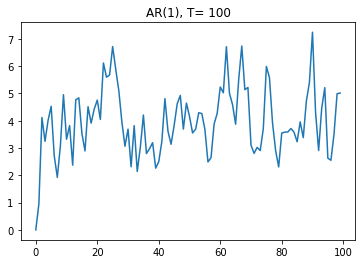

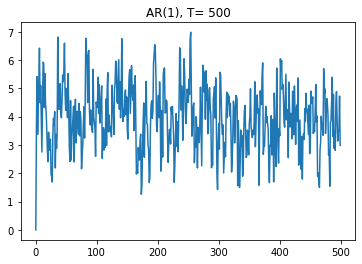

In [4]:
# Ultimos AR(1)

plt.plot(range(0, T1), y1)
plt.title("AR(1), T= 100")
plt.show()


plt.plot(range(0, T2), y2)
plt.title("AR(1), T= 500")
plt.show()

#### Histograma das Estimativas

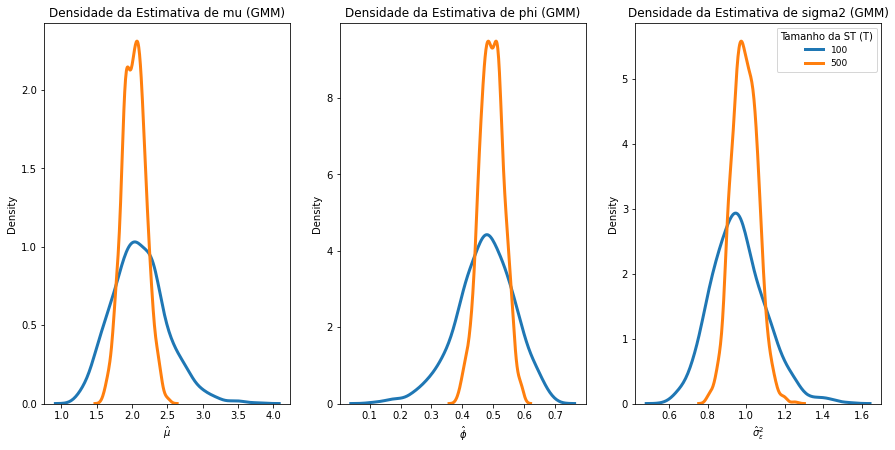

In [5]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(15, 7))

    
# Label do Histograma = Tupla de parametros
lab = 100

for T in range(0,2):


  # Plotando a densidade
  sns.distplot(parametros[:, 0, T], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = lab,
                ax=axes[0])

  # Plotando a densidade
  sns.distplot(parametros[:, 1, T], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = lab,
                ax=axes[1])
  
  # Plotando a densidade
  sns.distplot(parametros[:, 2, T], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = lab,
                ax=axes[2])
    
  lab = 500

    
# Formatação
axes[0].set_title('Densidade da Estimativa de mu (GMM)')
axes[1].set_title('Densidade da Estimativa de phi (GMM)')
axes[2].set_title('Densidade da Estimativa de sigma2 (GMM)')

plt.legend(prop={'size': 9}, title = 'Tamanho da ST (T)')

# Formatação
axes[0].set_xlabel(r'$\hat{\mu}$')
axes[1].set_xlabel(r'$\hat{\phi}$')
axes[2].set_xlabel(r'$\hat{\sigma}^2_{\varepsilon}$')

plt.ylabel('Density')
plt.show()

#### Estatisticas das Estimativas

In [6]:
tamanho = 100
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})


# Iterando em T = 100 e 500
for T in range(0, 2):

    # Calculando a média
    med_0 = np.mean(parametros[:, 0, T]) # mu
    med_1 = np.mean(parametros[:, 1, T]) # phi
    med_2 = np.mean(parametros[:, 2, T]) # sigma

    # Calculando o DP
    std_0 = np.std(parametros[:, 0, T])
    std_1 = np.std(parametros[:, 1, T])
    std_2 = np.std(parametros[:, 2, T])


    # Calculando o máximo
    max_0 = np.max(parametros[:, 0, T])
    max_1 = np.max(parametros[:, 1, T])
    max_2 = np.max(parametros[:, 2, T])


  # Calculando o mínimo
    min_0 = np.min(parametros[:, 0, T])
    min_1 = np.min(parametros[:, 1, T])
    min_2 = np.min(parametros[:, 2, T])

    # Se for tudo NA
    if sum(np.isnan(p_vals[:, T]))  == repeticoes:
      tamanho_teste = 'NA'
    else:
      tamanho_teste = len(p_vals[:, T][p_vals[:, T] < 5/100])/len(p_vals[:, T]) 

    print('-----------------------------------------------');
    print('T =',tamanho);
    print('Estatisticas    mu       phi      sigma2');
    print('----------------------------------------------');
    print(f'Média          {np.round(med_0, 3):5}  |  {np.round(med_1, 3):5}  |  {np.round(med_2, 3):5}')
    print(f'Desvio Padrão  {np.round(std_0, 3):5}  |  {np.round(std_1, 3):5}  |  {np.round(std_2, 3):5}')
    print(f'Máximo         {np.round(max_0, 3):5}  |  {np.round(max_1, 3):5}  |  {np.round(max_2, 3):5}')
    print(f'Mínimo         {np.round(min_0, 3):5}  |  {np.round(min_1, 3):5}  |  {np.round(min_2, 3):5}')
    print()
    print('Tamanho do Teste J =', tamanho_teste);


    tamanho += 400

-----------------------------------------------
T = 100
Estatisticas    mu       phi      sigma2
----------------------------------------------
Média          2.105  |  0.472  |  0.961
Desvio Padrão  0.389  |  0.093  |  0.142
Máximo          3.79  |  0.692  |  1.536
Mínimo         1.208  |   0.11  |  0.589

Tamanho do Teste J = 0.035
-----------------------------------------------
T = 500
Estatisticas    mu       phi      sigma2
----------------------------------------------
Média          2.028  |  0.494  |  0.993
Desvio Padrão  0.159  |  0.038  |  0.066
Máximo         2.519  |  0.591  |  1.253
Mínimo         1.595  |  0.385  |  0.804

Tamanho do Teste J = 0.033


## Item f)  

Considere o modelo AR(2):

$$y_t = \mu + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \varepsilon_t$$

Simule este modelo com $\mu = 2$, $\phi_1 = 0.5$, $\phi_2 = 0.3$ e $\varepsilon_t \sim iidN(0, \sigma^2_\varepsilon)$, sendo $\sigma^2_\varepsilon = 1$, e $t = 0, ..., T$. Assuma que $y_0 = y_1 = 0$.

Considere dois tamanhos de amostra, T = 100 e T = 500. Para cada tamanho de amostra:

> 1. Use as condições de momento definidas em (b) para estimar o vetor de parâmetros $\boldsymbol\theta = [\mu \quad \sigma^2_\varepsilon  \quad  \phi_1]'$ e faça o teste J de sobreidentificação, usando o nível de significância de 5%.

> 2. Repita este procedimento mil vezes, obtendo $\hat\mu^{(r)}, \hat\phi_1^{(r)}, \hat\phi_2^{(r)}, {\hat\sigma^2_{\varepsilon}}^{(r)}$ , $r = 1, ..., 1000$.

> 3. Estude o comportamento dessas estimativas (média, desvio-padrão, máximo, mínimo, histograma) e calcule o tamanho
do teste J de sobreidentificação.




### Definindo condições de Momento

In [7]:
class gmm(GMM):
    
    def momcond(self, params):
        p0, p1, p2 = params
        
        endog = self.endog[:, None]
        exog  = self.exog
        inst  = self.instrument 
  
        m1 =  yt - p0 - p1*yt_1
        m2 = (yt - p0 - p1*yt_1)*yt_1
        m3 = (yt - p0 - p1*yt_1)*yt_2
        m4 = (yt - p0 - p1*yt_1)**2 - p2
        
        g = np.column_stack((m1, m2, m3, m4))
        
        
        return g

### Simulando um AR(2) e estimando um AR(1)

In [ ]:
# Tamanhos de amostras
T1, T2 = 100, 500
repeticoes = 1000

# ''Chute'' inicial dos coeficientes
beta0 = np.array([2, 0.5, 1])

# Criando vetor de parametros/testes a ser populado
parametros = np.ones( (repeticoes, 3, 2) ) * np.inf
p_vals     = np.ones( (repeticoes, 2) ) * np.inf


for i in range(0, repeticoes):

#####################################################
###################### T = 100 ######################
#####################################################

  # Simulando T1 obs de normal(0,1)
  erro1 = np.random.normal(size = T1)

  # Construindo vetor para y (com zeros) para popular
  y1 = np.zeros(T1)

  # Preencho a partir do 2, ja que y_0 = y_1 = 0
  for t in range(2,T1):
      y1[t] = 2 + 0.5*y1[t-1] + 0.3*y1[t-2] + erro1[t]

  # Descarto a primeira OBS e deixando os vetores no mesmo tamanho
  yt   = y1[4:T1]
  yt_1 = y1[3:T1-1]
  yt_2 = y1[2:T1-2]


  # Rodando o modelo e chutando os coef corretos
  res = gmm(exog = yt, endog = yt_1, instrument= None, k_moms=4, k_params=3).fit(beta0)


  # Salvando os parâmetros
  parametros[i, 0, 0] = res.params[0] # mu
  parametros[i, 1, 0] = res.params[1] # phi
  parametros[i, 2, 0] = res.params[2] # sigma

  # Rodando o teste J e salvando
  testeJ = res.jtest()

  # Obtendo o p-valor
  p_vals[i, 0] = testeJ[1]

#####################################################
###################### T = 500 ######################
#####################################################



  # Simulando T2 obs de normal(0,1)
  erro2 = np.random.normal(size = T2)

  # Construindo vetor para y (com zeros) para popular
  y2 = np.zeros(T2)

  # Preencho a partir do 2, ja que y_0 = 0 e y_1 = 0
  for t in range(2, T2):    
      y2[t] = 2 + 0.5*y2[t-1] + 0.3*y2[t-2]  + erro2[t]

  # Descarto a primeira OBS e deixando os vetores no mesmo tamanho
  yt   = y2[4:T2]
  yt_1 = y2[3:T2-1]
  yt_2 = y2[2:T2-2]


  # Rodando o modelo e chutando os coef corretos
  res = gmm(exog = yt, endog = yt_1, instrument= None, k_moms=4, k_params=3).fit(beta0)


  # Salvando os parâmetros
  parametros[i, 0, 1] = res.params[0] # mu
  parametros[i, 1, 1] = res.params[1] # phi
  parametros[i, 2, 1] = res.params[2] # sigma


  # Rodando o teste J e salvando
  testeJ = res.jtest()

  # Obtendo o p-valor
  p_vals[i, 1] = testeJ[1]

#### Histograma das Estimativas

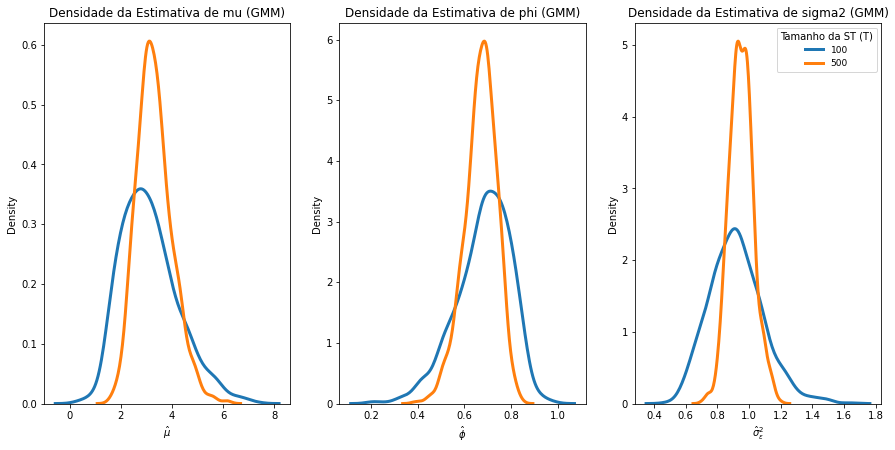

In [9]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(15, 7))

    
# Label do Histograma = Tupla de parametros
lab = 100

for T in range(0,2):


  # Plotando a densidade
  sns.distplot(parametros[:, 0, T], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = lab,
                ax=axes[0])

  # Plotando a densidade
  sns.distplot(parametros[:, 1, T], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = lab,
                ax=axes[1])
  
  # Plotando a densidade
  sns.distplot(parametros[:, 2, T], hist = False, kde = True,
                kde_kws = {'linewidth': 3},
                label = lab,
                ax=axes[2])
    
  lab = 500

    
# Formatação
axes[0].set_title('Densidade da Estimativa de mu (GMM)')
axes[1].set_title('Densidade da Estimativa de phi (GMM)')
axes[2].set_title('Densidade da Estimativa de sigma2 (GMM)')

plt.legend(prop={'size': 9}, title = 'Tamanho da ST (T)')

# Formatação
axes[0].set_xlabel(r'$\hat{\mu}$')
axes[1].set_xlabel(r'$\hat{\phi}$')
axes[2].set_xlabel(r'$\hat{\sigma}^2_{\varepsilon}$')

plt.ylabel('Density')
plt.show()

#### Estatística das Estimativas

In [10]:
tamanho = 100
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})


# Iterando em T = 100 e 500
for T in range(0, 2):

    # Calculando a média
    med_0 = np.mean(parametros[:, 0, T]) # mu
    med_1 = np.mean(parametros[:, 1, T]) # phi
    med_2 = np.mean(parametros[:, 2, T]) # sigma

    # Calculando o DP
    std_0 = np.std(parametros[:, 0, T])
    std_1 = np.std(parametros[:, 1, T])
    std_2 = np.std(parametros[:, 2, T])


    # Calculando o máximo
    max_0 = np.max(parametros[:, 0, T])
    max_1 = np.max(parametros[:, 1, T])
    max_2 = np.max(parametros[:, 2, T])


  # Calculando o mínimo
    min_0 = np.min(parametros[:, 0, T])
    min_1 = np.min(parametros[:, 1, T])
    min_2 = np.min(parametros[:, 2, T])

    # Se for tudo NA
    if sum(np.isnan(p_vals[:, T]))  == repeticoes:
      tamanho_teste = 'NA'
    else:
      tamanho_teste = len(p_vals[:, T][p_vals[:, T] < 5/100])/len(p_vals[:, T]) 

    print('-----------------------------------------------');
    print('T =',tamanho);
    print('Estatisticas    mu       phi      sigma2');
    print('----------------------------------------------');
    print(f'Média          {np.round(med_0, 3):5}  |  {np.round(med_1, 3):5}  |  {np.round(med_2, 3):5}')
    print(f'Desvio Padrão  {np.round(std_0, 3):5}  |  {np.round(std_1, 3):5}  |  {np.round(std_2, 3):5}')
    print(f'Máximo         {np.round(max_0, 3):5}  |  {np.round(max_1, 3):5}  |  {np.round(max_2, 3):5}')
    print(f'Mínimo         {np.round(min_0, 3):5}  |  {np.round(min_1, 3):5}  |  {np.round(min_2, 3):5}')
    print()
    print('Tamanho do Teste J =', tamanho_teste);


    tamanho += 400

-----------------------------------------------
T = 100
Estatisticas    mu       phi      sigma2
----------------------------------------------
Média          3.121  |  0.682  |   0.92
Desvio Padrão  1.122  |  0.117  |   0.17
Máximo         7.336  |  0.984  |  1.635
Mínimo         0.281  |  0.201  |  0.479

Tamanho do Teste J = 0.847
-----------------------------------------------
T = 500
Estatisticas    mu       phi      sigma2
----------------------------------------------
Média          3.311  |  0.669  |  0.951
Desvio Padrão  0.693  |  0.069  |  0.076
Máximo         6.155  |  0.842  |    1.2
Mínimo         1.597  |  0.388  |  0.704

Tamanho do Teste J = 1.0


## Item g)

Após analisar os resultados das simulações feitas em (e) e (f), quais conclusões são obtidas sobre a performance do GMM e do teste J de sobreidentificação? Dica: calcule $E[\varepsilon_t]$, $E[\varepsilon_t y_{t-1}]$, $E[\varepsilon_t y_{t-2}]$ e $E[\varepsilon_t^2]$ para o modelo AR(2) e construa condições de momento para estimar $\sigma^2_{\varepsilon}, \mu, \phi_1$ e $\phi_2$

---

**Resposta**

Os resultados são evidentes. Na letra (e) em que o modelo foi especificado corretamente, as estimativas de $\mu$ e $\phi_1$ não possuem viés, baixa variância, e o Tamanho do Teste J de sobreidentificação (ou exogeneidade dos instrumentos) ficou próximo de 5% (usando o nível de significancia de 5%), indicando que em somente 5% dos modelos estimados foi rejeitado a hipótese nula de validade das condições de sobreidentificação. Em outras palavras, em 95% dos modelos não rejeitamos H0 de validade nas condições de sobreidentificação.

`````
-----------------------------------------------
T = 100
Estatisticas    mu       phi      sigma2
----------------------------------------------
Média          2.105  |  0.472  |  0.961
Desvio Padrão  0.389  |  0.093  |  0.142
Máximo         3.790  |  0.692  |  1.536
Mínimo         1.208  |   0.11  |  0.589

Tamanho do Teste J = 0.035
-----------------------------------------------
T = 500
Estatisticas    mu       phi      sigma2
----------------------------------------------
Média          2.028  |  0.494  |  0.993
Desvio Padrão  0.159  |  0.038  |  0.066
Máximo         2.519  |  0.591  |  1.253
Mínimo         1.595  |  0.385  |  0.804

Tamanho do Teste J = 0.033
`````

Na letra (f) em que o modelo não foi especificado corretamente, as estimativas de $\mu$ e $\phi_1$ possuem viés, alta variância e o Tamanho do Teste J de sobreidentificação (ou exogeneidade dos instrumentos) ficou próximo de 100% (usando o nível de significancia de 5%), indicando que próximo de 100% dos modelos estimados foi rejeitado a hipótese nula de validade das condições de sobreidentificação. Em outras palavras, próximo de 0% dos modelos não rejeitamos H0 de validade nas condições de sobreidentificação.

````
-----------------------------------------------
T = 100
Estatisticas    mu       phi      sigma2
----------------------------------------------
Média          3.121  |  0.682  |   0.92
Desvio Padrão  1.122  |  0.117  |   0.17
Máximo         7.336  |  0.984  |  1.635
Mínimo         0.281  |  0.201  |  0.479

Tamanho do Teste J = 0.847
-----------------------------------------------
T = 500
Estatisticas    mu       phi      sigma2
----------------------------------------------
Média          3.311  |  0.669  |  0.951
Desvio Padrão  0.693  |  0.069  |  0.076
Máximo         6.155  |  0.842  |    1.2
Mínimo         1.597  |  0.388  |  0.704

Tamanho do Teste J = 1.0
````








# Problema 2)

Mostre que os estimadores de Mínimos Quadrados Ordinários (OLS) e Mínimos Quadrados em Dois
Estágios (TSLS) podem ser vistos como casos particulares do Método Generalizado dos Momentos (GMM). Dica: Seção 14.2 do Hamilton


---
**Resposta**



*   O estimador de GMM supõe que existem um conjunto de $r$ condições de ortogonalidade da forma
\begin{align}
E[h(\theta, w_t)] = 0 \tag{1}
\end{align}

onde $w_t$ é um vetor arbitrário de variáveis estritamente estacionárias, observadas na data $t$, $\theta$ é um vetor $(a \times 1) $ de parâmetros desconhecidos e $h(\cdot)$ é uma função diferenciável, avaliada no espaço do $R^r$ com $r \geq a$.


*   Seja o modelo de regressão linear,

$$y_t = x_t' \beta + u_t$$

onde $x_t$ é um vetor $(k \times 1)$ de variáveis explicativas. Uma hipótese para que não haja viés nas estimativas dos coeficientes é que o resíduo da regressão é não correlacionado com o vetor de variáveis explicativas, isto é,

\begin{align}
E[x_t u_t] & = 0 \\
E[x_t (y_t - x_t' \beta)] & = 0 \tag{2}
\end{align}

Seja $\theta = \beta$, $w_t = (y_t, x_t')'$ e $$h_t(\theta, w_t) = x_t (y_t - x_t' \beta).$$

Note que neste caso, o número de condições de ortogonalidade é o mesmo do número de parâmetros em $\beta$ ($r = a = k$). Logo, condição de ortogonalidade encontrada em (2) para o OLS é a mesma que a exigida no estimador GMM em (1). Então podemos ver que o modelo de regressão linear pode-se ser visto como uma especificação do GMM exatamente identificado:

\begin{align}
0  = g(\hat{\theta}; y_t) = \frac{1}{T} \sum_{i=1}^{T} x_t (y_t - x_t' \beta),
\end{align}

rearranjando, encontramos $\hat{\beta} \overset{GMM}{=} \Big( \sum_{i=1}^{T} x_t x_t' \Big)^{-1} \Big( \sum_{i=1}^{T} x_t y_t \Big) \overset{OLS}{=} (X'X)^{-1} X'y$.


*   Seja o modelo de regressão linear,

$$y_t = x_t' \beta + u_t$$

onde $x_t$ é um vetor $(k \times 1)$ de variáveis explicativas. Suponha, diferentemente do caso anterior, que algumas das variáveis explicativas sejam endógenas, isto é, $E(z_t u_t) \neq 0$. Seja $z_t$ um vetor $r \times 1$ de variáveis que são correlacionadas com $x_t$ mas não correlacionadas com $u_t$, isto é:

$$E[z_t u_t] = 0.$$

Neste caso, a condição de ortogonalidade é:

$$E[z_t (y_t - x_t' \beta)] = 0.$$

Do GMM, seja $w_t = (y_t x_t' z_t')'$ e $\theta = \beta$, $a = k$ e 

$$h(\theta, w_t) = z_t (y_t - x_t' \beta)$$


Suponha que o número de parâmetros a serem estimados seja igual ao número de condições de ortogonalidade $(a = k = r)$. Então o modelo é exatamente identificado, e satisfaz

$$\hat{\beta} \overset{GMM}{=} \Big( \sum_{i=1}^{T} z_t x_t'\Big) \Big( \sum_{i=1}^{T} z_t y_t\Big) \overset{IV}{=} (Z X')^{-1} ( Z Y)$$


# Problema 3)

Discuta como quebras estruturais podem ser incorporadas a estimação por GMM. Dica: Seção 14.3 do
Hamilton

---

**Resposta**

Uma forma simples é separar os momentos antes e depois de $T_0$ (período em que se suspeita uma quebra estrutural) e utilizar um teste $\chi^2$ para testar a validade das condições de momentos separadamente.

Seja 

\begin{align}
d_{1t} = 
\begin{cases}
  1, \text{ se } t \leq T_0 \\
  0, \text{ se } t > T_0  
\end{cases}
\end{align}

Se $h(\theta, w_t, d_{1t})$ é um vetor $r \times 1$ que possui média $\theta_0$, então
\begin{align}
h^*(\theta, w_t, d_{1t}) \equiv 
\begin{pmatrix}
  h(\theta, w_t) \cdot d_{1t}\\
  h(\theta, w_t) \cdot (1- d_{1t}) 
\end{pmatrix}
\end{align}
Os $a$ elementos de $\theta$ podem ser estimados usando as $2r$ condições de ortogonalidade dadas por $E[h^*(\theta_0, w_t, d_{1t})] = 0$ para $t = 1,..T$ simplesmente substituindo $h(\theta, w_t)$ em 

$$g(\theta, w_t) \equiv \frac{1}{N} \sum_{t=1}^{T} h(\theta, w_t)$$

por $h^*(\theta_0, w_t, d_{1t})$ e minimizando a sua respectiva forma quadrática. A partir disso, pode-se realizar o teste de Hansen ($\chi^2$) e comparar com o valor crítico de $\chi^2 (2r-a)$ para fornecer um teste da hipótese que $\theta_1 = \theta_2$, onde $\theta_1$ é o vetor de parâmetros antes da quebra estrutural e $\theta_2$ o vetor de parâmetros após a quebra.


# Problema 4) 

Considere o seguinte PGD:



\begin{align} 
\varepsilon_t \sim iidN (0, 1) \\
\upsilon_t \sim iidN (0, 1) \\
\xi_t \sim iidN (0, 1) \\
x_t = \lambda \varepsilon_t + \upsilon_t \\
z_t = \delta \upsilon_t + \xi_t \\
y_t = \beta_0 + \beta_1 x_t + \varepsilon_t \tag{1} \\
\end{align}

em que $t = 1, ..., T$, $\beta_0 = 1$ e $\beta_1 = 1/2$




##Item a) 

Calcule a covariância entre $x_t$ e $\varepsilon_t$. Em qual circunstância $x_t$ é endógeno no modelo (1)?

----

**Resposta:**

\begin{align}
Cov(x_t, \varepsilon_t) & = E[x_t \varepsilon_t] - E[x_t] E[\varepsilon_t] \\
& = E[x_t \varepsilon_t] \\
& = E[(\lambda \varepsilon_t + \upsilon_t) \varepsilon_t]  \\
& = \lambda E[\varepsilon_t^2] + E[\upsilon_t \varepsilon_t]  \\
& = \lambda 
\end{align}

Note que se $\lambda \neq 0$ a covariância entre o regressor de (1) e o erro é $\neq 0$, portanto, não vale a hipótese de exogeneidade do regressor. Em outras palavras, para haver endogeneidade, basta que $\lambda \neq 0$.




##Item b) 

Calcule a covariância entre $x_t$ e $z_t$. O que ocorre com esta covariância se $\delta$ é igual a zero?

----

**Resposta:**

\begin{align}
Cov(x_t, z_t) & = E[x_t z_t] - E[x_t] E[z_t] \\
%
& = E[(\lambda \varepsilon_t + \upsilon_t) (\delta \upsilon_t + \xi_t)] - E[\lambda \varepsilon_t + \upsilon_t] E[\delta \upsilon_t + \xi_t]\\
%
& = E[\lambda \varepsilon_t \delta \upsilon_t + \lambda \varepsilon_t \xi_t + \upsilon_t \delta \upsilon_t + \upsilon_t \xi_t] \\
%
& = \lambda \delta E[ \varepsilon_t  \upsilon_t] + \lambda E[\varepsilon_t \xi_t] + \delta E[\upsilon_t^2 ] + E[\upsilon_t \xi_t] \\
%
& = \delta 
\end{align}

Caso $\delta = 0$, então $x_t$ e $z_t$ são ortogonais.

##Item c)

Simule o PGD acima para cada um dos cenários descritos no Quadro 1, considerando T = 100 e T = 500

$$\text{Quadro 1 - Cenario}$$
\begin{array}{ccc}
\hline
Cenario & \lambda & \delta \\ \hline
1 & 0 & 1/2 \\ 
2 & 1/2 & 0 \\
3 & 1/2 & 1/5 \\
4 & 1/2 & 1/4 \\
5 & 1/2 & 1/3 \\
6 & 1/2 & 1/2 \\ \hline
\end{array}


Para cada cenário e tamanho de amostra:
1. Estime o modelo (1) usando ora o método de MQO ora o método de VI (com $z_t$ como instrumento)

2. Repita este procedimento mil vezes, obtendo $\hat{\beta_0}^{(r)}$ e $\hat{\beta_1}^{(r)}$, $r = 1, ..., 1000$.
3. Estude o comportamento dessas estimativas (média, desvio-padrão, máximo, mínimo, histograma) e dos testes t delas (tamanho).

In [1]:
pip install linearmodels --upgrade

Requirement already up-to-date: linearmodels in /usr/local/lib/python3.7/dist-packages (4.23)


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from linearmodels import IV2SLS, IVGMM, IVGMMCUE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Simulando e estimando por OLS/GMM (T=100)

In [3]:
# Tamanhos de amostras
T1, T2 = 100, 500

# Numero de vezes que gero cada amostra
repeticoes = 1000

# Grid de parametros dos diferentes cenarios
lammbda = np.array([0, 1/2, 1/2, 1/2, 1/2, 1/2])
delta   = np.array([1/2, 0, 1/5, 1/4, 1/3, 1/2])

# Parametros populacionais
beta0, beta1 = 1, 1/2


# Criando vetor de parametros a ser populado
parametros = np.ones( (repeticoes, 4, len(lammbda)) ) * np.inf
p_vals     = np.ones( (repeticoes, 4, len(lammbda)) ) * np.inf


for idx_param in range(0,len(lammbda)):
    for i in range(0, repeticoes):
        
        # Simulando T obs de normal(0,1)
        epsilon_T1 = np.random.normal(size=T1)
        upsilon_T1 = np.random.normal(size=T1)
        xi_T1      = np.random.normal(size=T1)
        
        
        # Gerando a série
        x_T1 = lammbda[idx_param]*epsilon_T1 + upsilon_T1
        z_T1 = delta[idx_param]*upsilon_T1 + xi_T1
        y_T1 = beta0 + beta1*x_T1 + epsilon_T1
        

        #Juntando a série em um dataframe
        df          = pd.DataFrame([y_T1, x_T1, z_T1]).T
        df.columns  = ['y_T1', 'x_T1', 'z_T1'] 


        # Rodando o modelo
        mod = sm.OLS(y_T1, sm.add_constant(x_T1))
        mod_iv = IV2SLS.from_formula('y_T1 ~ 1 + [x_T1 ~ z_T1]', df)
        
        # Fitando OLS e IV
        res = mod.fit()
        res_iv = mod_iv.fit()
        

        # Salvando os parâmetros
        parametros[i, 0, idx_param] = res.params[0] # alpha OLS
        parametros[i, 1, idx_param] = res.params[1] # beta OLS

        parametros[i, 2, idx_param] = res_iv.params[0] # alpha GMM
        parametros[i, 3, idx_param] = res_iv.params[1] # beta GMM

        # Armazenando a estatistica t
        p_vals[i, 0, idx_param] = res.pvalues[0]
        p_vals[i, 1, idx_param] = res.pvalues[1]

        p_vals[i, 2, idx_param] = res_iv.pvalues[0]
        p_vals[i, 3, idx_param] = res_iv.pvalues[1]

#### Gráficos e estatísticas das estimativas

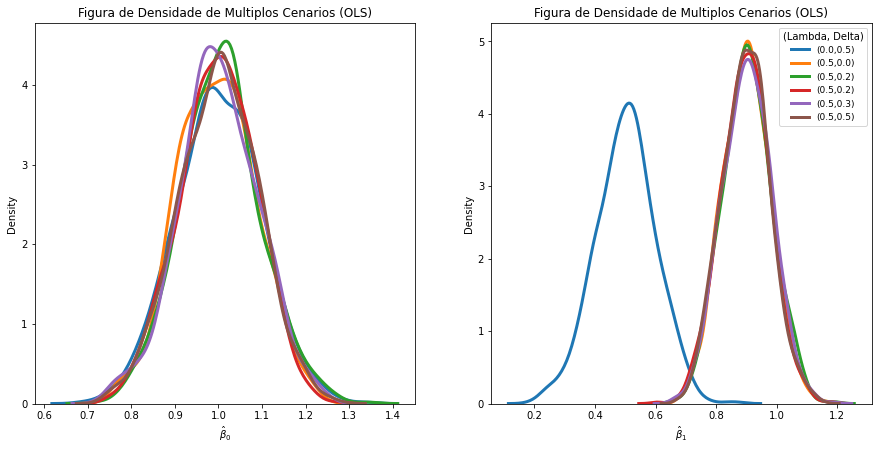

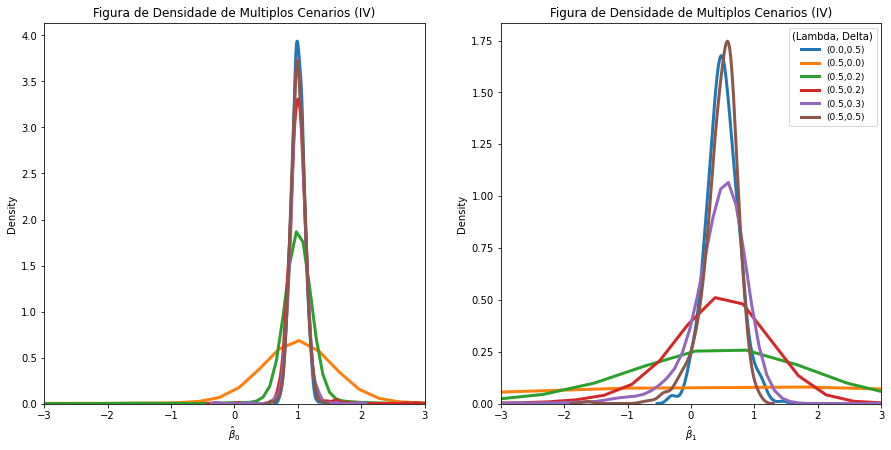

In [4]:
###################################################################
################## Olhando as estimativas do OLS ##################
###################################################################

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 7))

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):
    
    # Label do Histograma = Tupla de parametros
    lab = '(' + str(np.round(lammbda[idx_param], 1) ) + ',' + str(np.round(delta[idx_param], 1))  + ')'

    
    # Plotando a densidade
    sns.distplot(parametros[:, 0, idx_param], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab,
                 ax=axes[0])
    
    
# Formatação
axes[0].set_xlabel(r'$\hat{\beta}_0$')

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):
    
    # Label do Histograma = Tupla de parametros
    lab = '(' + str(np.round(lammbda[idx_param], 1) ) + ',' + str(np.round(delta[idx_param], 1))  + ')'

    # Plotando a densidade
    sns.distplot(parametros[:, 1, idx_param], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab,
                 ax=axes[1])
    
    
# Formatação

axes[0].set_title('Figura de Densidade de Multiplos Cenarios (OLS)')
axes[1].set_title('Figura de Densidade de Multiplos Cenarios (OLS)')

plt.legend(prop={'size': 9}, title = '(Lambda, Delta)')
axes[1].set_xlabel(r'$\hat{\beta}_1$')
plt.ylabel('Density')
plt.show()



###################################################################
################## Olhando as estimativas do GMM ##################
###################################################################



# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 7))

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):
    
    # Label do Histograma = Tupla de parametros
    lab = '(' + str(np.round(lammbda[idx_param], 1) ) + ',' + str(np.round(delta[idx_param], 1))  + ')'

    
    # Plotando a densidade
    sns.distplot(parametros[:, 2, idx_param], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab,
                 ax=axes[0])
    
    
# Formatação
axes[0].set_xlabel(r'$\hat{\beta}_0$')
plt.xlim(0.6, 1.5)

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):
    
    # Label do Histograma = Tupla de parametros
    lab = '(' + str(np.round(lammbda[idx_param], 1) ) + ',' + str(np.round(delta[idx_param], 1))  + ')'

    # Plotando a densidade
    sns.distplot(parametros[:, 3, idx_param], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab,
                 ax=axes[1])
    
    
# Formatação

axes[0].set_title('Figura de Densidade de Multiplos Cenarios (IV)')
axes[1].set_title('Figura de Densidade de Multiplos Cenarios (IV)')

axes[1].set_xlabel(r'$\hat{\beta}_1$')
axes[0].set_xlim(-3, 3)
axes[1].set_xlim(-3, 3)

plt.legend(prop={'size': 9}, title = '(Lambda, Delta)')
plt.ylabel('Density')
plt.show()

In [5]:
# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    # Calculando a média
    med_00 = np.mean(parametros[:, 0, idx_param]) # alpha OLS
    med_01 = np.mean(parametros[:, 1, idx_param]) # beta OLS

    med_10 = np.mean(parametros[:, 2, idx_param]) # alpha GMM
    med_11 = np.mean(parametros[:, 3, idx_param]) # beta GMM
            

    # Calculando o DP
    std_00 = np.std(parametros[:, 0, idx_param]) # alpha OLS
    std_01 = np.std(parametros[:, 1, idx_param]) # beta OLS

    std_10 = np.std(parametros[:, 2, idx_param]) # alpha GMM
    std_11 = np.std(parametros[:, 3, idx_param]) # beta GMM
            

    # Calculando o máximo
    max_00 = np.max(parametros[:, 0, idx_param]) # alpha OLS
    max_01 = np.max(parametros[:, 1, idx_param]) # beta OLS

    max_10 = np.max(parametros[:, 2, idx_param]) # alpha GMM
    max_11 = np.max(parametros[:, 3, idx_param]) # beta GMM        


  # Calculando o mínimo
    min_00 = np.min(parametros[:, 0, idx_param]) # alpha OLS
    min_01 = np.min(parametros[:, 1, idx_param]) # beta OLS

    min_10 = np.min(parametros[:, 2, idx_param]) # alpha GMM
    min_11 = np.min(parametros[:, 3, idx_param]) # beta GMM       

    print('------------------------------------------------------------------------------------');
    print(                 '[lambda, delta] = [',lammbda[idx_param],',',np.round(delta[idx_param],2),']');
    print('Estatisticas       beta_0(OLS)       beta_0(IV)       beta_1(OLS)       beta_1(IV)');
    print('------------------------------------------------------------------------------------');
    print(f'Média          {np.round(med_00, 3):13}  |  {np.round(med_10, 3):13}  |  {np.round(med_01, 3):13}  |  {np.round(med_11, 3):13}')
    print(f'Desvio Padrão  {np.round(std_00, 3):13}  |  {np.round(std_10, 3):13}  |  {np.round(std_01, 3):13}  |  {np.round(std_11, 3):13}')
    print(f'Máximo         {np.round(max_00, 3):13}  |  {np.round(max_10, 3):13}  |  {np.round(max_01, 3):13}  |  {np.round(max_11, 3):13}')
    print(f'Mínimo         {np.round(min_00, 3):13}  |  {np.round(min_10, 3):13}  |  {np.round(min_01, 3):13}  |  {np.round(min_11, 3):13}')
    print()

------------------------------------------------------------------------------------
[lambda, delta] = [ 0.0 , 0.5 ]
Estatisticas       beta_0(OLS)       beta_0(IV)       beta_1(OLS)       beta_1(IV)
------------------------------------------------------------------------------------
Média                    1.0  |            1.0  |          0.501  |          0.494
Desvio Padrão          0.097  |            0.1  |          0.099  |          0.254
Máximo                 1.336  |          1.368  |          0.872  |          1.476
Mínimo                 0.691  |          0.703  |          0.189  |         -0.343

------------------------------------------------------------------------------------
[lambda, delta] = [ 0.5 , 0.0 ]
Estatisticas       beta_0(OLS)       beta_0(IV)       beta_1(OLS)       beta_1(IV)
------------------------------------------------------------------------------------
Média                  0.995  |          1.119  |            0.9  |          0.537
Desvio Padrão 

In [6]:
estatisticas = ('Média', 'Desvio Padrão', 'Máximo', 'Mínimo', 'P-Values < 5%')
y_pos = np.arange(len(estatisticas))

# Criando vetor de parametros a ser populado
estat_OLS = np.ones( (2, len(lammbda), len(estatisticas) ) ) * np.inf
estat_IV = np.ones( (2, len(lammbda), len(estatisticas) ) ) * np.inf

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    # Calculando a média
    estat_OLS[0, idx_param, 0] = np.mean(parametros[:, 0, idx_param])
    estat_OLS[1, idx_param, 0] = np.mean(parametros[:, 1, idx_param])

    estat_IV[0, idx_param, 0] = np.mean(parametros[:, 2, idx_param])
    estat_IV[1, idx_param, 0] = np.mean(parametros[:, 3, idx_param])        


    # Calculando o DP
    estat_OLS[0, idx_param, 1] = np.std(parametros[:, 0, idx_param])
    estat_OLS[1, idx_param, 1] = np.std(parametros[:, 1, idx_param])

    estat_IV[0, idx_param, 1] = np.std(parametros[:, 2, idx_param])
    estat_IV[1, idx_param, 1] = np.std(parametros[:, 3, idx_param])        


    # Calculando o máximo
    estat_OLS[0, idx_param, 2]= np.max(parametros[:, 0, idx_param])
    estat_OLS[1, idx_param, 2] = np.max(parametros[:, 1, idx_param])

    estat_IV[0, idx_param, 2]= np.max(parametros[:, 2, idx_param])
    estat_IV[1, idx_param, 2] = np.max(parametros[:, 3, idx_param])        


    # Calculando o mínimo
    estat_OLS[0, idx_param, 3] = np.min(parametros[:, 0, idx_param])
    estat_OLS[1, idx_param, 3] = np.min(parametros[:, 1, idx_param])

    estat_IV[0, idx_param, 3] = np.min(parametros[:, 2, idx_param])
    estat_IV[1, idx_param, 3] = np.min(parametros[:, 3, idx_param])


    # Tamanho do teste
    estat_OLS[0, idx_param, 4] = len(p_vals[:, 0, idx_param][p_vals[:, 0, idx_param] < 5/100])/len(p_vals[:, 0, idx_param])
    estat_OLS[1, idx_param, 4] = len(p_vals[:, 1, idx_param][p_vals[:, 1, idx_param] < 5/100])/len(p_vals[:, 1, idx_param])

    estat_IV[0, idx_param, 4] = len(p_vals[:, 2, idx_param][p_vals[:, 2, idx_param] < 5/100])/len(p_vals[:, 2, idx_param])
    estat_IV[1, idx_param, 4] = len(p_vals[:, 3, idx_param][p_vals[:, 3, idx_param] < 5/100])/len(p_vals[:, 3, idx_param])

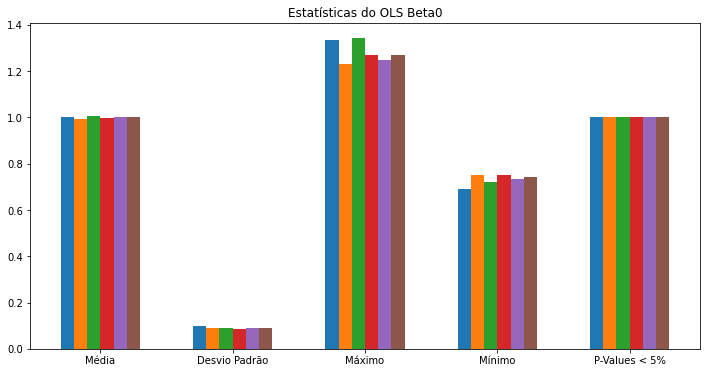

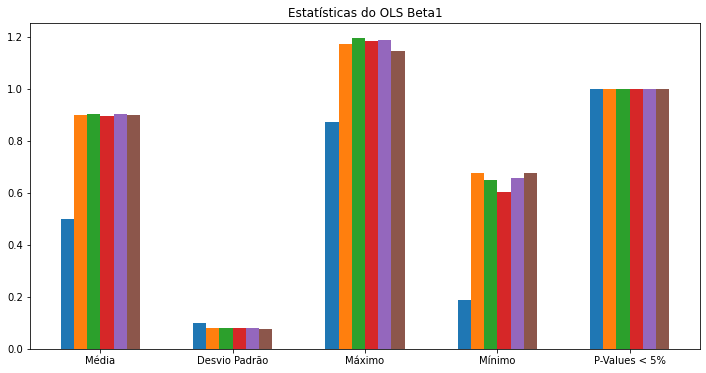

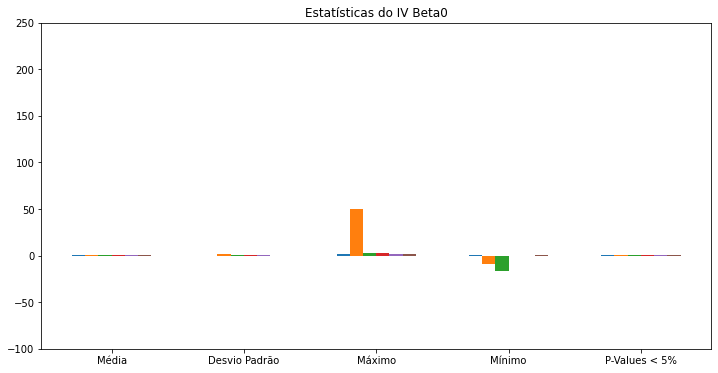

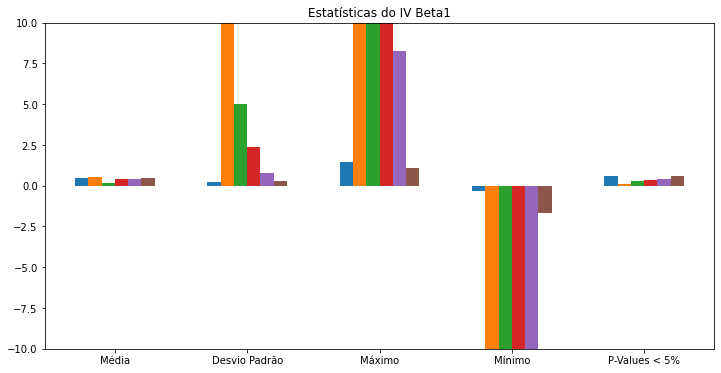

In [7]:
###################################################################
################## Olhando as estimativas do OLS ##################
###################################################################

######## -- Calculando para Beta0 -- ########
fig, ax = plt.subplots(figsize=(12,6))
width = 0.1       # the width of the bars
width1 = 0

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    plt.bar(y_pos + width1, estat_OLS[0, idx_param, :], width)

    width1 = width1 + width

plt.xticks((width + width + width/2 + y_pos), estatisticas)
plt.title('Estatísticas do OLS Beta0')
plt.show()

######## -- Calculando para Beta1 -- ########
fig, ax = plt.subplots(figsize=(12,6))

width = 0.1       # the width of the bars
width1 = 0

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    plt.bar(y_pos + width1, estat_OLS[1, idx_param, :], width)

    width1 = width1 + width


plt.xticks((width + width + width/2 + y_pos), estatisticas)
plt.title('Estatísticas do OLS Beta1')
plt.show()


###################################################################
################## Olhando as estimativas do GMM ##################
###################################################################


######## -- Calculando para Beta0 -- ########
fig, axes = plt.subplots(figsize=(12,6))
width = 0.1       # the width of the bars
width1 = 0

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    plt.bar(y_pos + width1, estat_IV[0, idx_param, :], width)

    width1 = width1 + width

axes.set_ylim(-100, 250)
plt.xticks((width + width + width/2 + y_pos), estatisticas)
plt.title('Estatísticas do IV Beta0')
plt.show()

######## -- Calculando para Beta1 -- ########
fig, axes = plt.subplots(figsize=(12,6))

width = 0.1       # the width of the bars
width1 = 0

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    plt.bar(y_pos + width1, estat_IV[1, idx_param, :], width)

    width1 = width1 + width

axes.set_ylim(-10, 10)
plt.xticks((width + width + width/2 + y_pos), estatisticas)
plt.title('Estatísticas do IV Beta1')
plt.show()

In [8]:
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

print('Pares de casos para parâmetros')
print('%8s' % 'Lambda :',lammbda)
print('%8s' % 'Delta :' ,delta)
print()
print('% de Rejeição de H0 para Beta_0')
print('%6s' % 'OLS :',estat_OLS[0, :, 4]*100)
print('%6s' % 'IV :',estat_IV[0, :, 4]*100)
print()
print('% de Rejeição de H0 para Beta_1')
print('%6s' % 'OLS :',estat_OLS[1, :, 4]*100 )
print('%6s' % 'IV :',estat_IV[1, :, 4]*100 )

Pares de casos para parâmetros
Lambda : [ 0.00  0.50  0.50  0.50  0.50  0.50]
 Delta : [ 0.50  0.00  0.20  0.25  0.33  0.50]

% de Rejeição de H0 para Beta_0
 OLS : [ 100.00  100.00  100.00  100.00  100.00  100.00]
  IV : [ 100.00  73.40  92.10  96.30  99.10  99.90]

% de Rejeição de H0 para Beta_1
 OLS : [ 99.80  100.00  100.00  100.00  100.00  100.00]
  IV : [ 60.60  9.80  28.80  34.50  44.00  59.50]


### Simulando e estimando por OLS/GMM (T=500)

In [9]:
# Tamanhos de amostras
T2 = 500

# Numero de vezes que gero cada amostra
repeticoes = 1000

# Grid de parametros dos diferentes cenarios
lammbda = np.array([0, 1/2, 1/2, 1/2, 1/2, 1/2])
delta   = np.array([1/2, 0, 1/5, 1/4, 1/3, 1/2])

# Parametros populacionais
beta0, beta1 = 1, 1/2


# Criando vetor de parametros a ser populado
parametros_T2 = np.ones( (repeticoes, 4, len(lammbda)) ) * np.inf
p_vals_T2     = np.ones( (repeticoes, 4, len(lammbda)) ) * np.inf


for idx_param in range(0,len(lammbda)):
    for i in range(0, repeticoes):
        
        # Simulando T2 obs de normal(0,1)
        epsilon_T2 = np.random.normal(size=T2)
        upsilon_T2 = np.random.normal(size=T2)
        xi_T2      = np.random.normal(size=T2)
        
        
        # Gerando a série
        x_T2 = lammbda[idx_param]*epsilon_T2 + upsilon_T2
        z_T2 = delta[idx_param]*upsilon_T2 + xi_T2
        y_T2 = beta0 + beta1*x_T2 + epsilon_T2
        

        #Juntando a série em um dataframe
        df          = pd.DataFrame([y_T2, x_T2, z_T2]).T
        df.columns  = ['y_T2', 'x_T2', 'z_T2'] 


        # Rodando o modelo
        mod = sm.OLS(y_T2, sm.add_constant(x_T2))
        mod_iv = IV2SLS.from_formula('y_T2 ~ 1 + [x_T2 ~ z_T2]', df)
        
        # Fitando OLS e IV
        res = mod.fit()
        res_iv = mod_iv.fit()
        

        # Salvando os parâmetros
        parametros_T2[i, 0, idx_param] = res.params[0] # alpha OLS
        parametros_T2[i, 1, idx_param] = res.params[1] # beta OLS

        parametros_T2[i, 2, idx_param] = res_iv.params[0] # alpha GMM
        parametros_T2[i, 3, idx_param] = res_iv.params[1] # beta GMM

        # Armazenando a estatistica t
        p_vals_T2[i, 0, idx_param] = res.pvalues[0]
        p_vals_T2[i, 1, idx_param] = res.pvalues[1]

        p_vals_T2[i, 2, idx_param] = res_iv.pvalues[0]
        p_vals_T2[i, 3, idx_param] = res_iv.pvalues[1]

#### Gráficos e estatísticas das estimativas

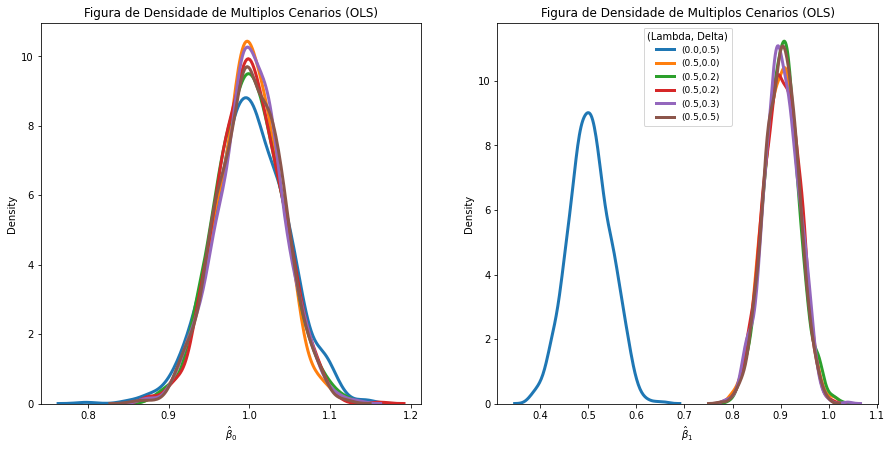

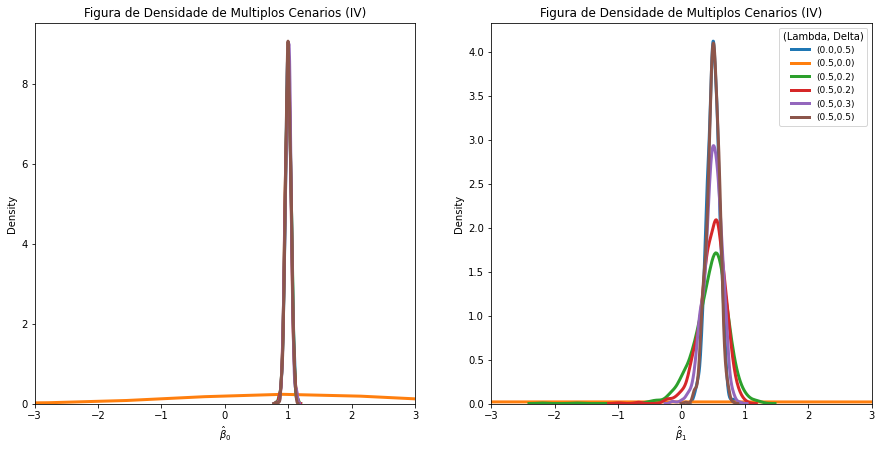

In [10]:
###################################################################
################## Olhando as estimativas do OLS ##################
###################################################################

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 7))

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):
    
    # Label do Histograma = Tupla de parametros
    lab = '(' + str(np.round(lammbda[idx_param], 1) ) + ',' + str(np.round(delta[idx_param], 1))  + ')'

    
    # Plotando a densidade
    sns.distplot(parametros_T2[:, 0, idx_param], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab,
                 ax=axes[0])
    
    
# Formatação
axes[0].set_xlabel(r'$\hat{\beta}_0$')

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):
    
    # Label do Histograma = Tupla de parametros
    lab = '(' + str(np.round(lammbda[idx_param], 1) ) + ',' + str(np.round(delta[idx_param], 1))  + ')'

    # Plotando a densidade
    sns.distplot(parametros_T2[:, 1, idx_param], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab,
                 ax=axes[1])
    
    
# Formatação

axes[0].set_title('Figura de Densidade de Multiplos Cenarios (OLS)')
axes[1].set_title('Figura de Densidade de Multiplos Cenarios (OLS)')

plt.legend(prop={'size': 9}, title = '(Lambda, Delta)')
axes[1].set_xlabel(r'$\hat{\beta}_1$')
plt.ylabel('Density')
plt.show()



###################################################################
################## Olhando as estimativas do GMM ##################
###################################################################



# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 7))

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):
    
    # Label do Histograma = Tupla de parametros
    lab = '(' + str(np.round(lammbda[idx_param], 1) ) + ',' + str(np.round(delta[idx_param], 1))  + ')'

    
    # Plotando a densidade
    sns.distplot(parametros_T2[:, 2, idx_param], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab,
                 ax=axes[0])
    
    
# Formatação
axes[0].set_xlabel(r'$\hat{\beta}_0$')
plt.xlim(0.6, 1.5)

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):
    
    # Label do Histograma = Tupla de parametros
    lab = '(' + str(np.round(lammbda[idx_param], 1) ) + ',' + str(np.round(delta[idx_param], 1))  + ')'

    # Plotando a densidade
    sns.distplot(parametros_T2[:, 3, idx_param], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = lab,
                 ax=axes[1])
    
    
# Formatação

axes[0].set_title('Figura de Densidade de Multiplos Cenarios (IV)')
axes[1].set_title('Figura de Densidade de Multiplos Cenarios (IV)')

axes[1].set_xlabel(r'$\hat{\beta}_1$')

axes[0].set_xlim(-3, 3)
axes[1].set_xlim(-3, 3)

plt.legend(prop={'size': 9}, title = '(Lambda, Delta)')
plt.ylabel('Density')
plt.show()

In [11]:
# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    # Calculando a média
    med_00 = np.mean(parametros_T2[:, 0, idx_param]) # alpha OLS
    med_01 = np.mean(parametros_T2[:, 1, idx_param]) # beta OLS

    med_10 = np.mean(parametros_T2[:, 2, idx_param]) # alpha GMM
    med_11 = np.mean(parametros_T2[:, 3, idx_param]) # beta GMM
            

    # Calculando o DP
    std_00 = np.std(parametros_T2[:, 0, idx_param]) # alpha OLS
    std_01 = np.std(parametros_T2[:, 1, idx_param]) # beta OLS

    std_10 = np.std(parametros_T2[:, 2, idx_param]) # alpha GMM
    std_11 = np.std(parametros_T2[:, 3, idx_param]) # beta GMM
            

    # Calculando o máximo
    max_00 = np.max(parametros_T2[:, 0, idx_param]) # alpha OLS
    max_01 = np.max(parametros_T2[:, 1, idx_param]) # beta OLS

    max_10 = np.max(parametros_T2[:, 2, idx_param]) # alpha GMM
    max_11 = np.max(parametros_T2[:, 3, idx_param]) # beta GMM        


  # Calculando o mínimo
    min_00 = np.min(parametros_T2[:, 0, idx_param]) # alpha OLS
    min_01 = np.min(parametros_T2[:, 1, idx_param]) # beta OLS

    min_10 = np.min(parametros_T2[:, 2, idx_param]) # alpha GMM
    min_11 = np.min(parametros_T2[:, 3, idx_param]) # beta GMM       

    print('------------------------------------------------------------------------------------');
    print(                 '[lambda, delta] = [',lammbda[idx_param],',',np.round(delta[idx_param],2),']');
    print('Estatisticas       beta_0(OLS)       beta_0(IV)       beta_1(OLS)       beta_1(IV)');
    print('------------------------------------------------------------------------------------');
    print(f'Média          {np.round(med_00, 3):13}  |  {np.round(med_10, 3):13}  |  {np.round(med_01, 3):13}  |  {np.round(med_11, 3):13}')
    print(f'Desvio Padrão  {np.round(std_00, 3):13}  |  {np.round(std_10, 3):13}  |  {np.round(std_01, 3):13}  |  {np.round(std_11, 3):13}')
    print(f'Máximo         {np.round(max_00, 3):13}  |  {np.round(max_10, 3):13}  |  {np.round(max_01, 3):13}  |  {np.round(max_11, 3):13}')
    print(f'Mínimo         {np.round(min_00, 3):13}  |  {np.round(min_10, 3):13}  |  {np.round(min_01, 3):13}  |  {np.round(min_11, 3):13}')
    print()

------------------------------------------------------------------------------------
[lambda, delta] = [ 0.0 , 0.5 ]
Estatisticas       beta_0(OLS)       beta_0(IV)       beta_1(OLS)       beta_1(IV)
------------------------------------------------------------------------------------
Média                  1.001  |          1.001  |          0.502  |            0.5
Desvio Padrão          0.046  |          0.046  |          0.044  |          0.099
Máximo                 1.147  |          1.147  |          0.658  |          0.857
Mínimo                 0.798  |          0.814  |           0.38  |          0.176

------------------------------------------------------------------------------------
[lambda, delta] = [ 0.5 , 0.0 ]
Estatisticas       beta_0(OLS)       beta_0(IV)       beta_1(OLS)       beta_1(IV)
------------------------------------------------------------------------------------
Média                  0.999  |          0.825  |          0.901  |          4.009
Desvio Padrão 

In [12]:
estatisticas = ('Média', 'Desvio Padrão', 'Máximo', 'Mínimo', 'P-Values < 5%')
y_pos = np.arange(len(estatisticas))

# Criando vetor de parametros a ser populado
estat_OLS_T2 = np.ones( (2, len(lammbda), len(estatisticas) ) ) * np.inf
estat_IV_T2 = np.ones( (2, len(lammbda), len(estatisticas) ) ) * np.inf

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    # Calculando a média
    estat_OLS_T2[0, idx_param, 0] = np.mean(parametros[:, 0, idx_param])
    estat_OLS_T2[1, idx_param, 0] = np.mean(parametros[:, 1, idx_param])

    estat_IV_T2[0, idx_param, 0] = np.mean(parametros[:, 2, idx_param])
    estat_IV_T2[1, idx_param, 0] = np.mean(parametros[:, 3, idx_param])        


    # Calculando o DP
    estat_OLS_T2[0, idx_param, 1] = np.std(parametros[:, 0, idx_param])
    estat_OLS[1, idx_param, 1] = np.std(parametros[:, 1, idx_param])

    estat_IV_T2[0, idx_param, 1] = np.std(parametros[:, 2, idx_param])
    estat_IV_T2[1, idx_param, 1] = np.std(parametros[:, 3, idx_param])        


    # Calculando o máximo
    estat_OLS_T2[0, idx_param, 2]= np.max(parametros[:, 0, idx_param])
    estat_OLS_T2[1, idx_param, 2] = np.max(parametros[:, 1, idx_param])

    estat_IV_T2[0, idx_param, 2]= np.max(parametros[:, 2, idx_param])
    estat_IV_T2[1, idx_param, 2] = np.max(parametros[:, 3, idx_param])        


    # Calculando o mínimo
    estat_OLS_T2[0, idx_param, 3] = np.min(parametros[:, 0, idx_param])
    estat_OLS_T2[1, idx_param, 3] = np.min(parametros[:, 1, idx_param])

    estat_IV_T2[0, idx_param, 3] = np.min(parametros[:, 2, idx_param])
    estat_IV_T2[1, idx_param, 3] = np.min(parametros[:, 3, idx_param])


    # Tamanho do teste
    estat_OLS_T2[0, idx_param, 4] = len(p_vals_T2[:, 0, idx_param][p_vals_T2[:, 0, idx_param] < 5/100])/len(p_vals_T2[:, 0, idx_param])
    estat_OLS_T2[1, idx_param, 4] = len(p_vals_T2[:, 1, idx_param][p_vals_T2[:, 1, idx_param] < 5/100])/len(p_vals_T2[:, 1, idx_param])

    estat_IV_T2[0, idx_param, 4] = len(p_vals_T2[:, 2, idx_param][p_vals_T2[:, 2, idx_param] < 5/100])/len(p_vals_T2[:, 2, idx_param])
    estat_IV_T2[1, idx_param, 4] = len(p_vals_T2[:, 3, idx_param][p_vals_T2[:, 3, idx_param] < 5/100])/len(p_vals_T2[:, 3, idx_param])

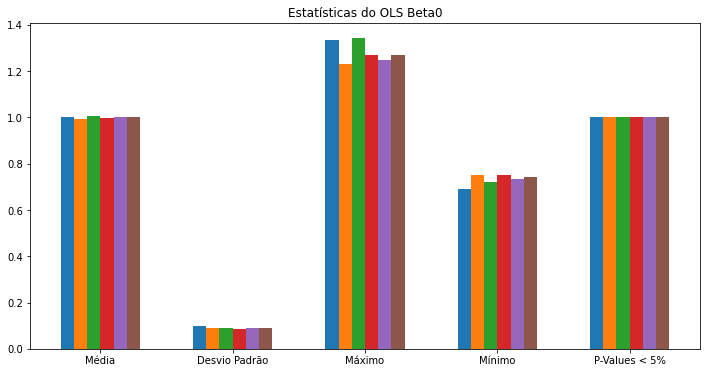

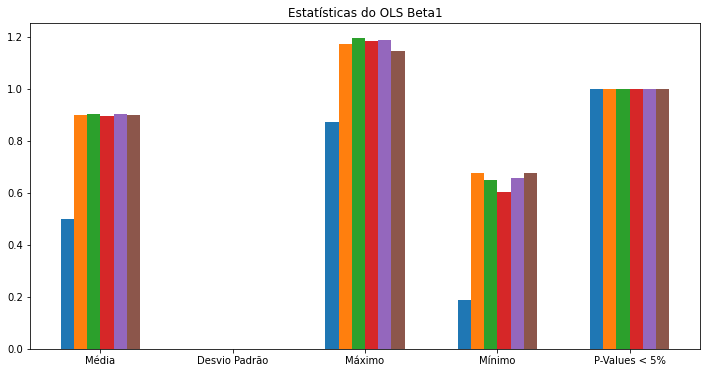

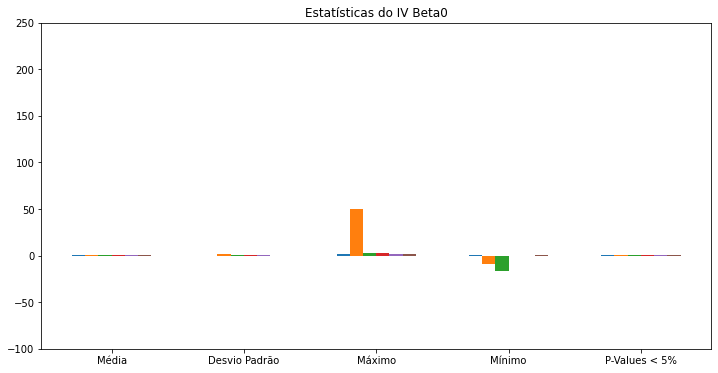

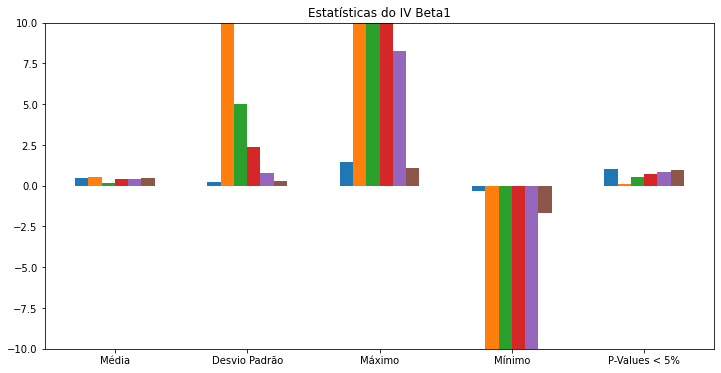

In [13]:
###################################################################
################## Olhando as estimativas do OLS ##################
###################################################################

######## -- Calculando para Beta0 -- ########
fig, ax = plt.subplots(figsize=(12,6))
width   = 0.1       # the width of the bars
width1  = 0

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    plt.bar(y_pos + width1, estat_OLS_T2[0, idx_param, :], width)

    width1 = width1 + width

plt.xticks((width + width + width/2 + y_pos), estatisticas)
plt.title('Estatísticas do OLS Beta0')
plt.show()

######## -- Calculando para Beta1 -- ########
fig, ax = plt.subplots(figsize=(12,6))

width = 0.1       # the width of the bars
width1 = 0

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    plt.bar(y_pos + width1, estat_OLS_T2[1, idx_param, :], width)

    width1 = width1 + width


plt.xticks((width + width + width/2 + y_pos), estatisticas)
plt.title('Estatísticas do OLS Beta1')
plt.show()


###################################################################
################## Olhando as estimativas do GMM ##################
###################################################################


######## -- Calculando para Beta0 -- ########
fig, axes = plt.subplots(figsize=(12,6))
width = 0.1       # the width of the bars
width1 = 0

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    plt.bar(y_pos + width1, estat_IV_T2[0, idx_param, :], width)

    width1 = width1 + width

axes.set_ylim(-100, 250)
plt.xticks((width + width + width/2 + y_pos), estatisticas)
plt.title('Estatísticas do IV Beta0')
plt.show()

######## -- Calculando para Beta1 -- ########
fig, axes = plt.subplots(figsize=(12,6))

width = 0.1       # the width of the bars
width1 = 0

# Iterando nos parâmetros
for idx_param, param in enumerate(lammbda):

    plt.bar(y_pos + width1, estat_IV_T2[1, idx_param, :], width)

    width1 = width1 + width

axes.set_ylim(-10, 10)
plt.xticks((width + width + width/2 + y_pos), estatisticas)
plt.title('Estatísticas do IV Beta1')
plt.show()

In [14]:
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

print('Pares de casos para parâmetros')
print('%8s' % 'Lambda :',lammbda)
print('%8s' % 'Delta :' ,delta)
print()
print('% de Rejeição de H0 para Beta_0')
print('%6s' % 'OLS :',estat_OLS_T2[0, :, 4]*100)
print('%6s' % 'IV :',estat_IV_T2[0, :, 4]*100)
print()
print('% de Rejeição de H0 para Beta_1')
print('%6s' % 'OLS :',estat_OLS_T2[1, :, 4]*100 )
print('%6s' % 'IV :',estat_IV_T2[1, :, 4]*100 )

Pares de casos para parâmetros
Lambda : [ 0.00  0.50  0.50  0.50  0.50  0.50]
 Delta : [ 0.50  0.00  0.20  0.25  0.33  0.50]

% de Rejeição de H0 para Beta_0
 OLS : [ 100.00  100.00  100.00  100.00  100.00  100.00]
  IV : [ 100.00  82.10  100.00  100.00  100.00  100.00]

% de Rejeição de H0 para Beta_1
 OLS : [ 100.00  100.00  100.00  100.00  100.00  100.00]
  IV : [ 99.50  9.30  55.20  69.80  86.00  98.60]
